In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, recall_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import AdaBoostClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


Data cleaning

In [ ]:
df = pd.read_csv(r'C:/Users/dimit/OneDrive/Desktop/git_projects/Hotel booking/hotel_bookings.csv')

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
df.arrival_date_year.unique()

array([2015, 2016, 2017], dtype=int64)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

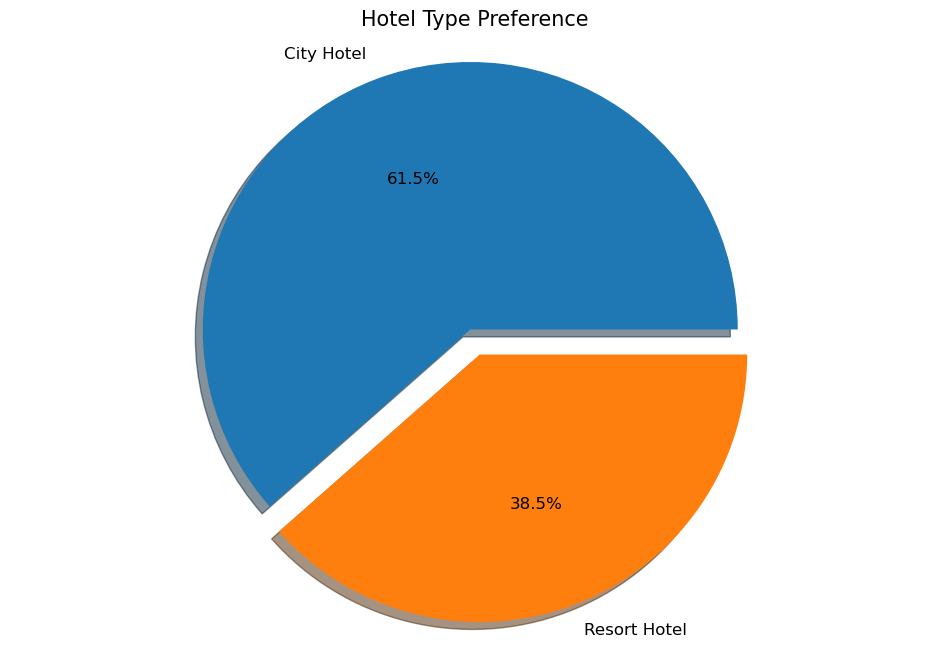

In [ ]:
hotel_receptions = df[df['is_canceled'] == 0]['hotel'].value_counts()
hotels = df['hotel'].unique()

plt.figure(figsize=(12,8))
plt.pie(hotel_receptions, labels=['City Hotel','Resort Hotel'],
autopct="%1.1f%%",shadow=True,explode=(0.1,0),textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Hotel Type Preference', fontsize = 15)
plt.show()

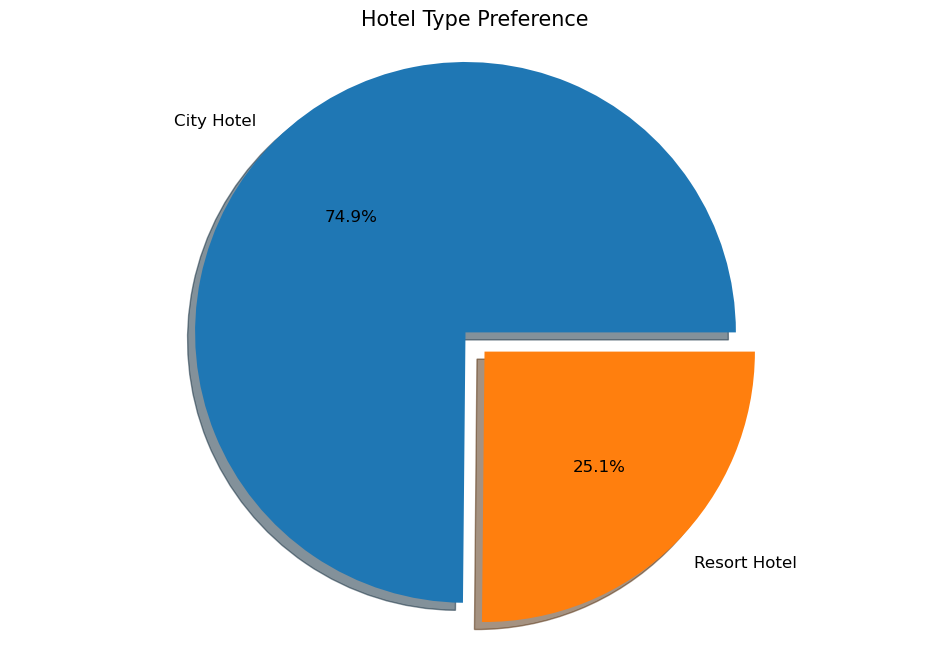

In [ ]:
hotel_receptions = df[df['is_canceled'] == 1]['hotel'].value_counts()
hotels = df['hotel'].unique()

plt.figure(figsize=(12,8))
plt.pie(hotel_receptions, labels=['City Hotel','Resort Hotel'],
autopct="%1.1f%%",shadow=True,explode=(0.1,0),textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Hotel Type Preference', fontsize = 15)
plt.show()

In [ ]:
country_counts =  df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_counts.columns = ['country', 'No of guests']
country_counts

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
country_counts.head(10)

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


<Axes: xlabel='country'>

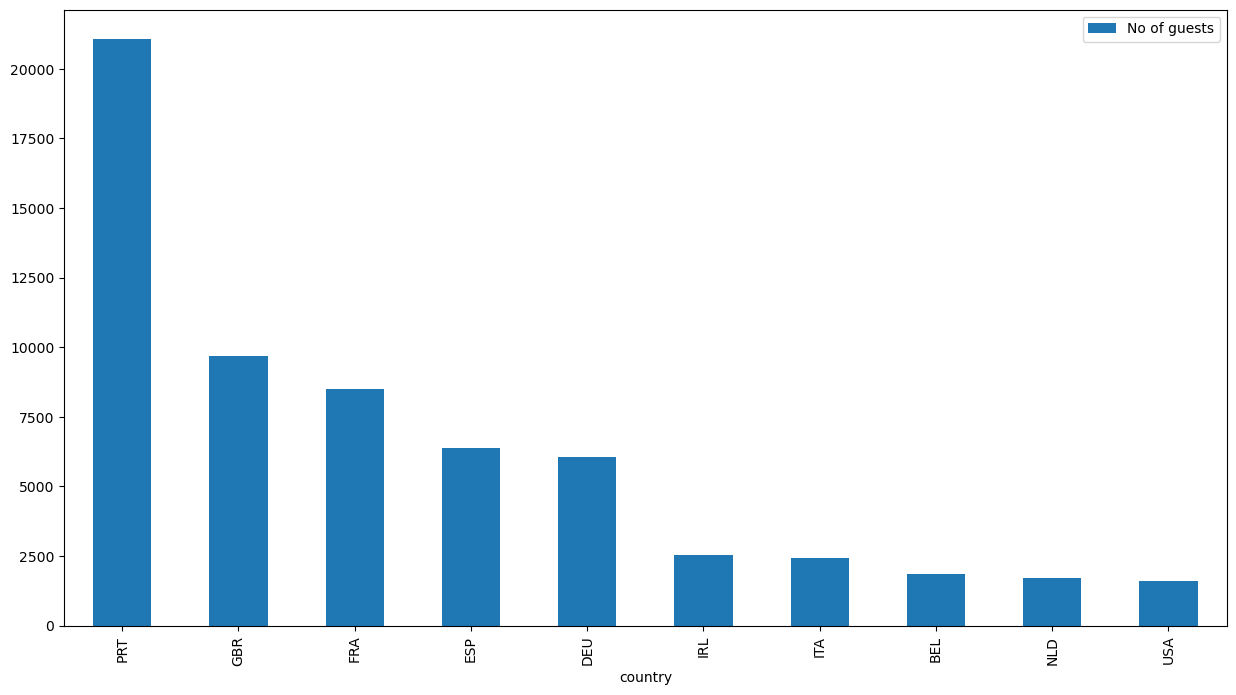

In [ ]:
country_counts.head(10).plot(kind='bar',x='country',y='No of guests',figsize=(15,8))

In [ ]:
from datetime import datetime

def stringToMonthNum(m_string):
  data = datetime.strptime(m_string.lower().strip(), '%B')
  n_month = data.month
  return n_month

In [ ]:
def monthNumToString(row):
  data = datetime(year=row['arrival_date_year'], month=row['arrival_date_month'], day=row['arrival_date_day_of_month'])
  month_string = data.strftime('%B')
  return month_string

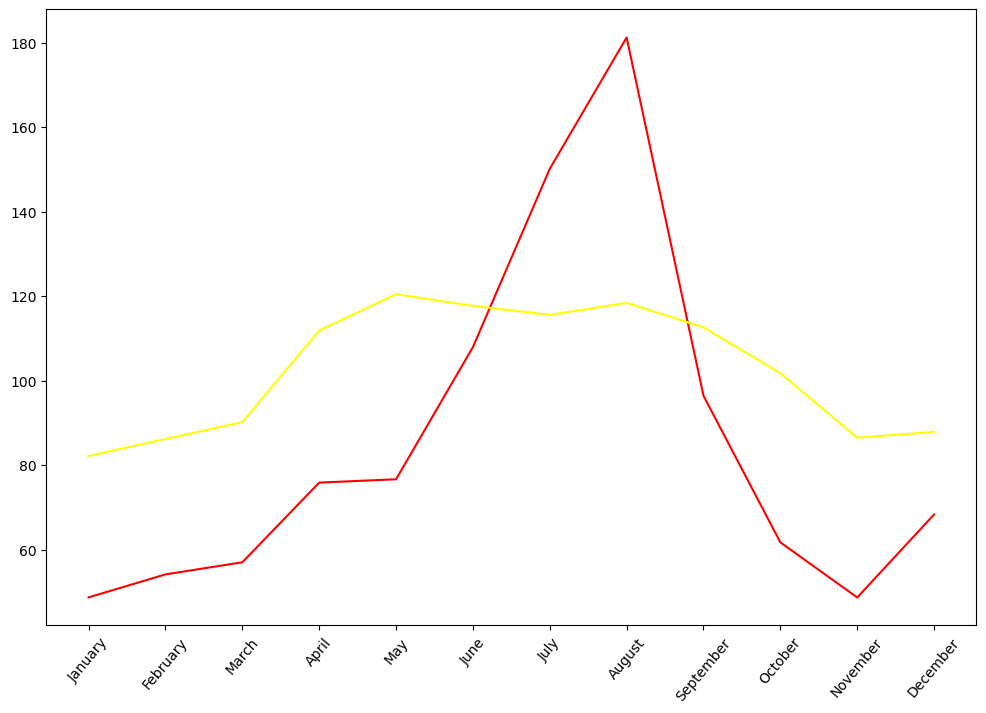

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].apply(stringToMonthNum)

hotel_bookings_df = df.sort_values(by='arrival_date_month')

hotel_bookings_df['arrival_date_month'] = hotel_bookings_df.apply(monthNumToString, axis=1)

resort = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'Resort Hotel') & (hotel_bookings_df['is_canceled'] == 0)]
city_hotel = hotel_bookings_df[(hotel_bookings_df['hotel'] == 'City Hotel') & (hotel_bookings_df['is_canceled'] == 0)]

resort = resort.groupby(['arrival_date_month'], sort=False)['adr'].mean()
city_hotel = city_hotel.groupby(['arrival_date_month'], sort=False)['adr'].mean()

plt.figure(figsize=(12,8))
plt.plot(resort, label='Resort Hotel',color='red')
plt.plot(city_hotel, label='City Hotel',color='yellow')
plt.xticks(rotation=50)
plt.show()

FixedFormatter should only be used together with FixedLocator


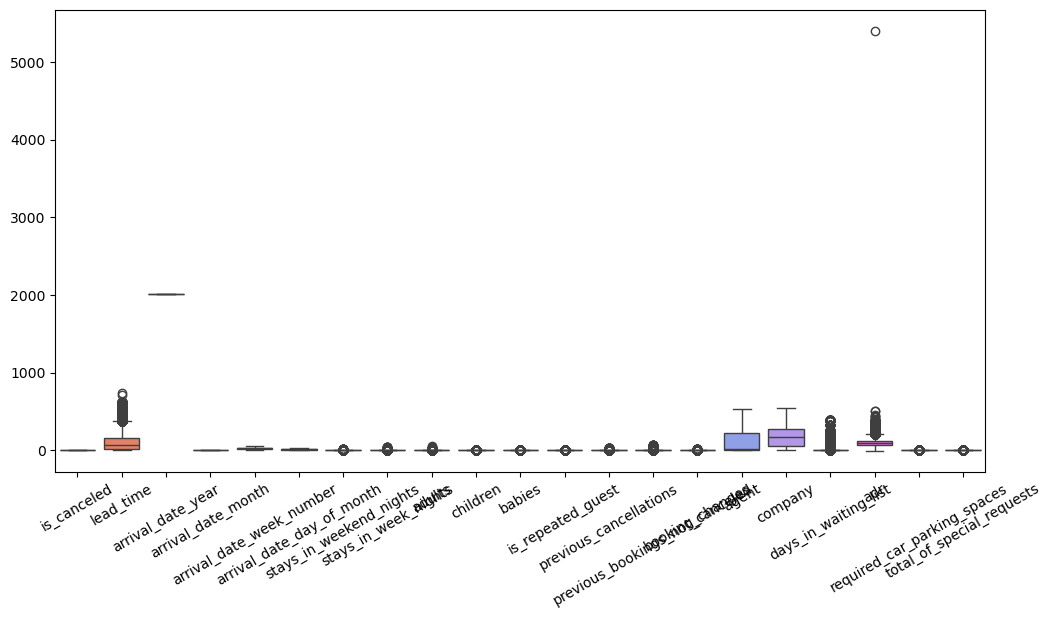

In [ ]:
features = list(df.columns)
features
plt.figure(figsize=(12, 6))
outliers=sns.boxplot(data=df[features]) 
outliers.set_xticklabels(outliers.get_xticklabels(),rotation=30)
None

In [ ]:
# reservation_status, reservation_status_date spoils the predictions of the model
df = df.drop(['company', 'agent', 'reservation_status', 'reservation_status_date'], axis=1)


In [ ]:
df =df.dropna()

EDA 

In [ ]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
cancelations_per_country=df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
cancelations_per_country

,country,count
0,PRT,27515
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


In [ ]:
bookings_per_country=df.groupby('country')['is_canceled'].count().sort_values(ascending=False).reset_index()
bookings_per_country

,country,is_canceled
0,PRT,48586
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
...,...,...
172,MLI,1
173,MMR,1
174,MRT,1
175,SMR,1


In [ ]:
b=bookings_per_country.merge( cancelations_per_country, on='country')
b

,country,is_canceled,count
0,PRT,48586,27515
1,GBR,12129,2453
2,FRA,10415,1934
3,ESP,8568,2177
4,DEU,7287,1218
...,...,...,...
122,VGB,1,1
123,UMI,1,1
124,NIC,1,1
125,FJI,1,1


In [ ]:
b['percentage of cancelation']=round(((b['count']/b['is_canceled'])*100),2)
b

,country,is_canceled,count,percentage of cancelation
0,PRT,48586,27515,56.63
1,GBR,12129,2453,20.22
2,FRA,10415,1934,18.57
3,ESP,8568,2177,25.41
4,DEU,7287,1218,16.71
...,...,...,...,...
122,VGB,1,1,100.00
123,UMI,1,1,100.00
124,NIC,1,1,100.00
125,FJI,1,1,100.00


In [ ]:
b.rename(columns={'is_canceled': 'Total bookings', 'count': 'cancelations'}, inplace=True)

In [ ]:
b

,country,Total bookings,cancelations,percentage of cancelation
0,PRT,48586,27515,56.63
1,GBR,12129,2453,20.22
2,FRA,10415,1934,18.57
3,ESP,8568,2177,25.41
4,DEU,7287,1218,16.71
...,...,...,...,...
122,VGB,1,1,100.00
123,UMI,1,1,100.00
124,NIC,1,1,100.00
125,FJI,1,1,100.00


In [ ]:
b[(b['percentage of cancelation']>40) & (b['Total bookings']>50)].sort_values(by='percentage of cancelation', ascending=False)

,country,Total bookings,cancelations,percentage of cancelation
54,ARE,51,43,84.31
0,PRT,48586,27515,56.63
24,AGO,362,205,56.63
15,CHN,999,462,46.25
26,MAR,259,109,42.08
33,KOR,133,55,41.35
27,TUR,248,102,41.13


In [ ]:
cancelations_per_segment=df[df['is_canceled'] == 1]['market_segment'].value_counts().reset_index()

In [ ]:
bookings_per_segment=df.groupby('market_segment')['is_canceled'].count().sort_values(ascending=False).reset_index()
bookings_per_segment

,market_segment,is_canceled
0,Online TA,56402
1,Offline TA/TO,24160
2,Groups,19806
3,Direct,12448
4,Corporate,5111
5,Complementary,734
6,Aviation,237


In [ ]:
c=bookings_per_segment.merge( cancelations_per_segment, on='market_segment')
c

,market_segment,is_canceled,count
0,Online TA,56402,20738
1,Offline TA/TO,24160,8278
2,Groups,19806,12097
3,Direct,12448,1920
4,Corporate,5111,978
5,Complementary,734,90
6,Aviation,237,52


In [ ]:
c.rename(columns={'is_canceled': 'Total bookings', 'count': 'cancelations'}, inplace=True)
c['percentage of cancelation']=round(((b['cancelations']/b['Total bookings'])*100),2)
c

,market_segment,Total bookings,cancelations,percentage of cancelation
0,Online TA,56402,20738,56.63
1,Offline TA/TO,24160,8278,20.22
2,Groups,19806,12097,18.57
3,Direct,12448,1920,25.41
4,Corporate,5111,978,16.71
5,Complementary,734,90,35.40
6,Aviation,237,52,24.65


In [ ]:
df = df.drop(['country'], axis=1)

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [ ]:
cat_vals=df.select_dtypes(include=['object']).columns


In [ ]:
cat_vals

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [ ]:
df[df.is_canceled==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


In [ ]:
# correlation_matrix = df.corr()
# plt.figure(figsize=(18, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
# plt.title("Correlation Matrix Heatmap")
# plt.show()

In [ ]:
df['hotel'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

In [ ]:
cat_vals=df.select_dtypes(include=['object']).columns
cat_vals

Index(['meal', 'market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=[ 'meal', 'market_segment', 'distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'],dtype=int)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,2015,7,27,1,0,0,2,...,0,0,0,1,0,0,0,0,1,0
1,0,0,737,2015,7,27,1,0,0,2,...,0,0,0,1,0,0,0,0,1,0
2,0,0,7,2015,7,27,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,13,2015,7,27,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,14,2015,7,27,1,0,2,2,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,8,35,30,2,5,2,...,0,0,0,1,0,0,0,0,1,0
119386,1,0,102,2017,8,35,31,2,5,3,...,0,0,0,1,0,0,0,0,1,0
119387,1,0,34,2017,8,35,31,2,5,2,...,0,0,0,1,0,0,0,0,1,0
119388,1,0,109,2017,8,35,31,2,5,2,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
not_cancelled = df[df['is_canceled'] == 0]


<Axes: xlabel='lead_time', ylabel='Count'>

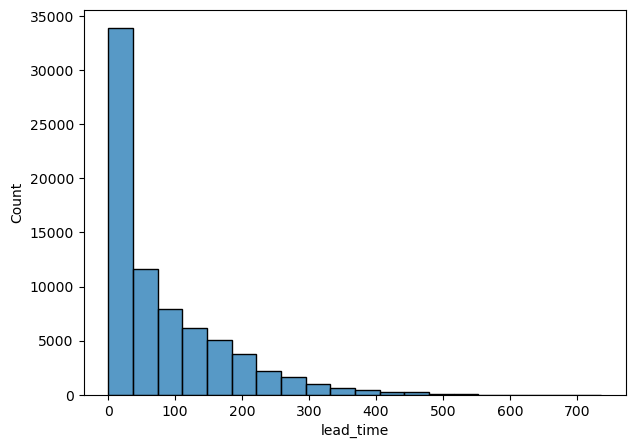

In [ ]:
plt.figure(figsize = (7, 5))
sns.histplot(not_cancelled["lead_time"], bins = 20)

Modeling

In [ ]:
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
balanced_acc=balanced_accuracy_score(y_test, predictions)
report=classification_report(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('=======================================')
print(f"balanced acc {balanced_acc * 100:.2f}%" )
print('=======================================')
print(report)

Accuracy: 83.43%
balanced acc 79.52%
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     18693
           1       0.88      0.64      0.74     11032

    accuracy                           0.83     29725
   macro avg       0.85      0.80      0.81     29725
weighted avg       0.84      0.83      0.83     29725



In [ ]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 7,
    'learning_rate': 1,
    'eval_metric': 'logloss'
}
num_rounds = 500


xgb = XGBClassifier(**params, n_estimators=num_rounds)
# xgb = XGBClassifier()

# Train the XGBoost model
model_xgb = xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_xgb)
balanced_acc=balanced_accuracy_score(y_test, y_pred_xgb)
report=classification_report(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('=======================================')
print(f"balanced acc {balanced_acc * 100:.2f}%" )
print('=======================================')
print(report)

Accuracy: 85.70%
balanced acc 84.26%
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18693
           1       0.82      0.79      0.80     11032

    accuracy                           0.86     29725
   macro avg       0.85      0.84      0.85     29725
weighted avg       0.86      0.86      0.86     29725



In [ ]:
light = lgb.LGBMClassifier()
light.fit(X_train, y_train)
lightgb_pred=light.predict(X_test)
accuracy = accuracy_score(y_test, lightgb_pred)
balanced_acc=balanced_accuracy_score(y_test, lightgb_pred)
report=classification_report(y_test, lightgb_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('=======================================')
print(f"balanced acc {balanced_acc * 100:.2f}%" )
print('=======================================')
print(report)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 33121, number of negative: 56052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 936
[LightGBM] [Info] Number of data points in the train set: 89173, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371424 -> initscore=-0.526112
[LightGBM] [Info] Start training from score -0.526112
Accuracy: 84.20%
balanced acc 81.06%
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18693
           1       0.86      0.69      0.76     11032

    accuracy                           0.84     29725
   macro avg       0.85      0.81      0.82     29725
weighted avg       0.84      0.84      0.84     29725


In [ ]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1,random_state=0)
abc.fit(X_train, y_train)
lightgb_pred=abc.predict(X_test)
accuracy = accuracy_score(y_test, lightgb_pred)
balanced_acc=balanced_accuracy_score(y_test, lightgb_pred)
report=classification_report(y_test, lightgb_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('=======================================')
print(f"balanced acc {balanced_acc * 100:.2f}%" )
print('=======================================')
print(report)

Accuracy: 81.45%
balanced acc 77.51%
              precision    recall  f1-score   support

           0       0.81      0.93      0.86     18693
           1       0.84      0.62      0.71     11032

    accuracy                           0.81     29725
   macro avg       0.82      0.78      0.79     29725
weighted avg       0.82      0.81      0.81     29725



In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) #learn only from train
X_train_sc = scaler.transform(X_train) # apply the learnings to train
X_test_sc = scaler.transform(X_test) # apply the learnings to test

In [ ]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 7,
    'learning_rate': 1,
    'eval_metric': 'logloss'
}
num_rounds = 500


xgb = XGBClassifier(**params, n_estimators=num_rounds)
# xgb = XGBClassifier()

# Train the XGBoost model
model_xgb = xgb.fit(X_train_sc, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_sc)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_xgb)
balanced_acc=balanced_accuracy_score(y_test, y_pred_xgb)
report=classification_report(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")
print('=======================================')
print(f"balanced acc {balanced_acc * 100:.2f}%" )
print('=======================================')
print(report)

Accuracy: 85.70%
balanced acc 84.26%
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18693
           1       0.82      0.79      0.80     11032

    accuracy                           0.86     29725
   macro avg       0.85      0.84      0.85     29725
weighted avg       0.86      0.86      0.86     29725



In [ ]:
fis = xgb.feature_importances_
fis_df = pd.DataFrame(fis, columns=['0'], index=X.columns)
f=fis_df.sort_values(by='0', ascending = False).head(20)
f

,0
deposit_type_Non Refund,0.771918
required_car_parking_spaces,0.092129
previous_cancellations,0.046559
market_segment_Online TA,0.005599
previous_bookings_not_canceled,0.004780
assigned_room_type_I,0.004229
customer_type_Transient,0.003775
meal_FB,0.003668
total_of_special_requests,0.002755
assigned_room_type_A,0.002668


In [ ]:
b=f.index.tolist()

In [ ]:
import shap
explainer = shap.Explainer(xgb.predict,X_test_sc)

In [ ]:
a=pd.DataFrame(X_test_sc, columns=X.columns)
a

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0.704034,-0.827591,1.192154,0.144761,0.135159,0.596034,-0.932911,-0.793605,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
1,0.704034,-0.098277,1.192154,-0.827628,-0.895796,-0.201635,0.072521,-0.266103,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
2,-1.420385,-0.762140,-0.221910,-1.151758,-1.190355,-0.771398,-0.932911,0.788903,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
3,0.704034,-0.388132,-1.635975,0.793021,0.650637,-1.341161,-0.932911,-0.266103,-1.427729,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,-1.728549,1.931168
4,0.704034,-0.219829,-0.221910,-0.827628,-0.822157,-0.657445,1.077953,-1.321108,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29720,0.704034,0.696490,-0.221910,0.144761,-0.012120,-1.683019,-0.932911,-0.793605,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
29721,-1.420385,-0.603187,1.192154,-1.800017,-1.779472,0.026271,0.072521,-0.266103,-1.427729,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,-0.189048,-0.069528,-1.728549,1.931168
29722,0.704034,0.098077,1.192154,-0.503498,-0.527598,0.254176,-0.932911,0.261400,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,-2.654006,2.670399,-0.036555,-0.189048,-0.069528,0.578520,-0.517821
29723,0.704034,-0.303981,-1.635975,1.765410,1.902511,1.621608,-0.932911,0.788903,0.236431,-0.261928,...,-0.048119,0.0,-0.003349,0.376789,-0.374476,-0.036555,5.289660,-0.069528,-1.728549,-0.517821


In [ ]:
shap_values = explainer(a)

PermutationExplainer explainer: 29726it [1:33:25,  5.29it/s]                           


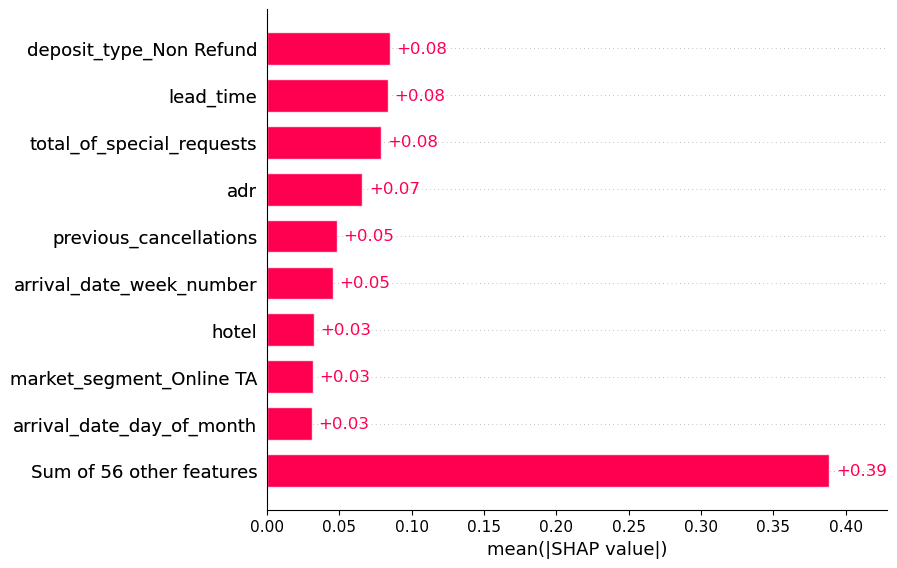

In [ ]:
shap.plots.bar(shap_values)

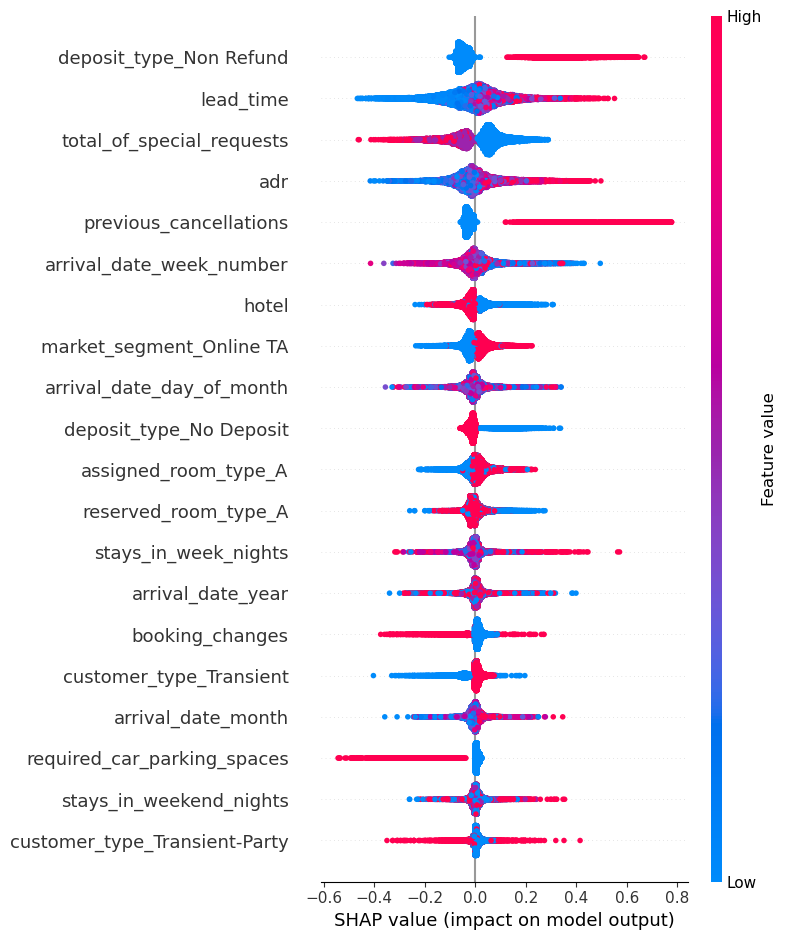

In [ ]:
shap.summary_plot(shap_values)

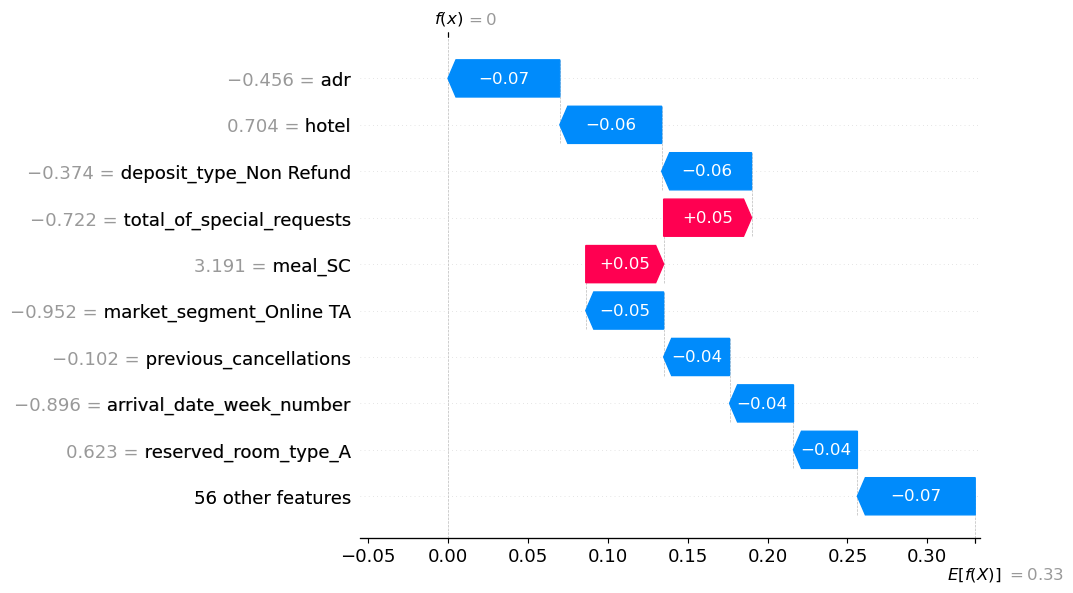

In [ ]:
shap.plots.waterfall(shap_values[1])